$FILLED  TRIANGLES$


이전까지는 간단한 도형들을 켄버스에 올려서 그리는 코드를 작성하였다.

putpixel과 수식을 이용한 간단한 알고리즘을 제작하기도 하였다.

이번 챕터에서는 삼각형을 그리기 위해 수식을 사용한 알고리즘을 작성하기로한다.

In [16]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, h=1.0, color=[255,255,255]):
        self.x = x
        self.y = y
        self.h = h
        self.color = color

class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def put_pixel(self, x, y, color,line_width):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        
    def interpolate(self, i0, d0,i1, d1): #보간
        if i0==i1:
            return [d0]
        else:
            values = []
            a = (d1-d0) / (i1 - i0)
            d = d0
            for i in range(i1 - i0+1):
                values.append(d)
                d += a
            return values
        
    def draw_line(self, p0, p1, color, line_width):
        if np.abs(p0.x - p1.x) > abs(p0.y - p1.y):
            # line is horizontal-ish
            if p0.x > p1.x:
                p0, p1 = p1, p0
            ys = self.interpolate(p0.x, p0.y, p1.x, p1.y)
            for i in range(p1.x-p0.x+1):
                self.put_pixel(i+p0.x, ys[i], color, line_width)
        else:
            if p0.y > p1.y:
                p0, p1 = p1, p0
            xs = self.interpolate(p0.y,p0.x,p1.y,p1.x)
            for i in range(p1.y-p0.y+1):
                self.put_pixel(xs[i], i+p0.y, color, line_width)
                
    def draw_wireframe_triangle(self, p0, p1, p2, color, line_width):
        self.draw_line(p0, p1, color, line_width)
        self.draw_line(p1, p2, color, line_width)
        self.draw_line(p2, p0, color, line_width)
    

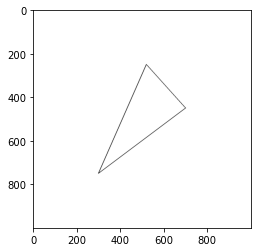

In [25]:
canvas1 = Canvas(1000,1000)
point1 = Point(-200, -250)
point2 = Point(200, 50)
point3 = Point(20, 250)

canvas1.draw_wireframe_triangle(point1, point2, point3, [0,0,0], 2)

plt.imshow(canvas1.img)

삼각형의 3 점들을 위 아래로 나누는 코드를 추가한다.

y축을 기준으로 점들을 배열한다. 

항상 P0이 삼각형의 가장 낮은 점이고 P2가 가장 높은 점이라고 가정하기 때문에 가능한 모든 순서를 처리할 필요는 없다.

In [36]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y, h=1.0, color=[255,255,255]):
        self.x = x
        self.y = y
        self.h = h
        self.color = color

class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def put_pixel(self, x, y, color,line_width):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        
    def interpolate(self, i0, d0,i1, d1):
        if i0==i1:
            return [d0]
        else:
            values = []
            a = (d1-d0) / (i1 - i0)
            d = d0
            for i in range(i1 - i0+1):
                values.append(d)
                d += a
            return values
        
    def draw_line(self, p0, p1, color, line_width):
        if np.abs(p0.x - p1.x) > abs(p0.y - p1.y):
            # line is horizontal-ish
            if p0.x > p1.x:
                p0, p1 = p1, p0
            
            ys = self.interpolate(p0.x,p0.y,p1.x,p1.y)

            for i in range(p1.x-p0.x+1):
                self.put_pixel(i+p0.x,ys[i],color,line_width)
                    
        else:
            # line is vertical-ish
                        # line is horizontal-ish
            if p0.y > p1.y:
                p0, p1 = p1, p0
            
            xs = self.interpolate(p0.y,p0.x,p1.y,p1.x)
            for i in range(p1.y-p0.y+1):
                self.put_pixel(xs[i], i+p0.y, color, line_width)
                
    def draw_wireframe_triangle(self, p0, p1, p2, color, line_width):
        self.draw_line(p0, p1, color, line_width)
        self.draw_line(p1, p2, color, line_width)
        self.draw_line(p2, p0, color, line_width)
    
    def draw_filled_trangle(self, p0, p1, p2, color, line_width):
        if p1.y < p0.y:
            p0, p1 = p1, p0
        if p2.y < p0.y:
            p0, p2 = p2, p0
        if p2.y < p1.y:
            p2, p1 = p1, p2
            
        x01 = self.interpolate(p0.y, p0.x, p1.y, p1.x)
        x12 = self.interpolate(p1.y, p1.x, p2.y, p2.x)
        x02 = self.interpolate(p0.y, p0.x, p2.y, p2.x)
    
           

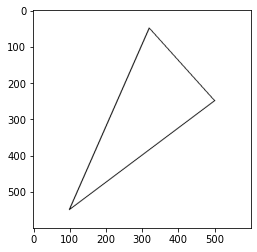

In [37]:
canvas1 = Canvas(600,600)
point1 = Point(-200, -250)
point2 = Point(200, 50)
point3 = Point(20, 250)

canvas1.draw_wireframe_triangle(point1, point2, point3, [0,0,0], 2)
canvas1.draw_filled_trangle(point5, point6, point7, [0,255,0], 1)

plt.imshow(canvas1.img)